### How to run GLDADEc -v slim

#### Setup

=== Compile *.pyx file ===

move to this directory (cd ./gldadec)

```python setup.py build_ext --inplace```

** Products **
1. "build" folder
2. _lda_basic.cpython-39-x86_64-linux-gnu.so


=== Initial trial (Ubuntu) ===
- > No module named 'Cython
	
	```pip install cython```

- > command 'gcc' failed: No such file or directory
	
	```sudo apt-get install gcc```



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Base_dir = '/workspace/github/Dev/GLDADec' # cloning repository
import sys
sys.path.append(Base_dir)

from run import pipeline

/workspace/github/Dev/GLDADec


***
#### Load data

In [2]:
# %% load data
raw_df = pd.read_csv(Base_dir + '/data/mouse_dili_expression.csv',index_col=0)
marker_dic = pd.read_pickle(Base_dir + '/data/liver_merged_35_dic.pkl')
random_sets = pd.read_pickle(Base_dir + '/data/100_random_sets.pkl')

***
#### Run

  0%|          | 0/10 [00:00<?, ?it/s]

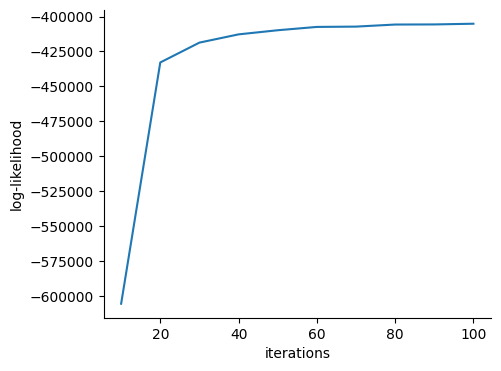

In [3]:
pp = pipeline.Pipeline(verbose=False)
pp.from_predata(raw_df,target_samples=['Ctrl', 'APAP'],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False)
pp.gene_selection(method='CV',outlier=True,topn=1000)
pp.add_marker_genes(target_cells=[],add_dic=marker_dic)
pp.deocnv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=1,minmax=True,mm_scale=10)
pp.deconv(n=10,add_topic=0,n_iter=100,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=True,var_plot=False)

***
#### Evaluation

cells in res : ['Neutrophil', 'Monocyte', 'Natural killer cell', 'Kupffer cell']
cells in ref : ['Neutrophil', 'Monocyte', 'NK', 'Kupffer']


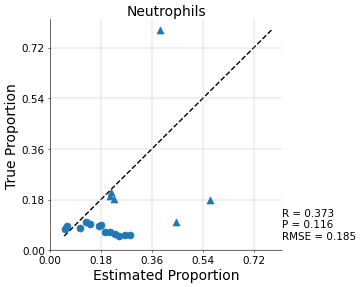

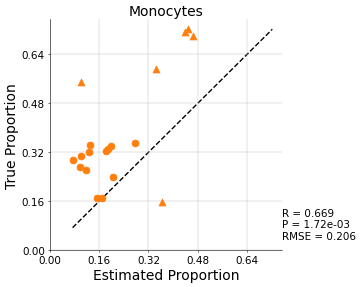

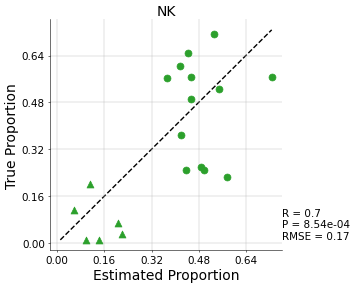

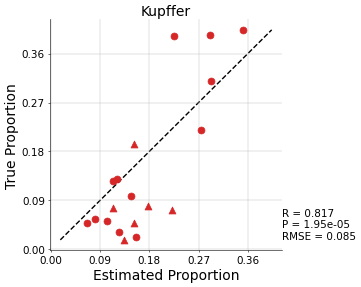

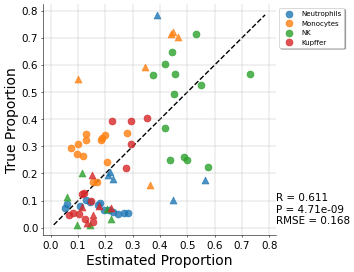

{'Kupffer': [('R', 0.8172), ('P', '1.95e-05'), ('RMSE', 0.0849)],
 'Monocytes': [('R', 0.6694), ('P', '1.72e-03'), ('RMSE', 0.2056)],
 'NK': [('R', 0.6997), ('P', '8.54e-04'), ('RMSE', 0.1699)],
 'Neutrophils': [('R', 0.3731), ('P', 0.116), ('RMSE', 0.185)]}


In [4]:
# evaluate
res = pp.merge_total_res
target_facs = pd.read_csv(Base_dir + '/data/mouse_dili_facs.csv',index_col=0)/100
pp.evaluate(facs_df=target_facs,deconv_norm_range=['Neutrophil','Monocyte','Natural killer cell','Kupffer cell'],
            facs_norm_range=['Neutrophil','Monocyte','NK','Kupffer'],
            res_names=[['Neutrophil'],['Monocyte'],['Natural killer cell'],['Kupffer cell']],
            ref_names=[['Neutrophil'],['Monocyte'],['NK'],['Kupffer']],
            title_list = ['Neutrophils','Monocytes','NK','Kupffer'],
            target_samples = ['Ctrl', 'APAP'],
            figsize=(6,6),dpi=50,plot_size=100,multi=False)